# Principal Component Analysis (PCA)


I highly recommend [this video from StatQuest](https://www.youtube.com/watch?v=FgakZw6K1QQ) as an intuitive explaination on what's going on behidn the scenes. He breaks down the PC Analysis into a simple Pythagorean Thereom, for those of you who dislike linear algebra/calculus. It's a great intro to Eigenvalues and Eigenvectors as well! When you're done watching, we'll see the PCA in action.

In [1]:
# Import analysis libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
# Load the cancer dataset from sklearn and assign it to a variable

from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

In [3]:
# Check out the keys
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [4]:
# Assign the data and column names to a pandas dataframe

df = pd.DataFrame(cancer['data'],columns=cancer['feature_names'])
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
# Check the shape of the dataframe
df.shape

(569, 30)

The dataset has 30 features and only 569 observations. If we were to apply a machine learning algorithm on the data as is, we would be at a major risk of **overfitting**. Overfitting is the term used to describe a model that is not generalizing well on new data. One thing we can do to prevent overfitting is to reduce the complexity (number of features) in training. As a general rule, you want a minimum of 100 data points to features, but more is always better!

Before we apply PCA, we need to scale the data. We'll do this using **standardization** because it is well suited for outliers that may exist in the dataset. Standardization scales the data to have a mean of 0 and standard deviation of 1, so that all datapoints lie on a standard sale.

Then we will apply PCA with 2 components to get a better idea of how PCA works on features.

In [8]:
# Import the StandardScaler from sklearn
from sklearn.preprocessing import StandardScaler

In [9]:
# Instantiate the StandardScaler & fit the data

scaler = StandardScaler()
scaler.fit(df)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [12]:
# Create a dataframe with the scaled results
scaled_data = scaler.transform(df)

In [13]:
# Import PCA
from sklearn.decomposition import PCA

In [14]:
# Instantiate PCA & fit the data

pca = PCA(n_components=2)
pca.fit(scaled_data)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [15]:
# Transform the data into its principle components and assign it to a variable
x_pca = pca.transform(scaled_data)

In [18]:
# Compare it's number of features with the old data set
print('\n')
print('Previous number of features : ', scaled_data.shape[1])
print('\n')
print('New number of features : ', x_pca.shape[1])



Previous number of features :  30


New number of features :  2


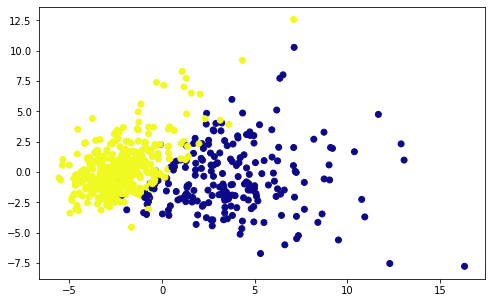

In [25]:
# Plot the two principle components on a scatter plot, seperate them by color 
# according to the target variable. Notice how the different categories
# seem to have clustered together, with only 2 variables to visualize with.

plt.figure(figsize=(8,5))
plt.scatter(x_pca[:,0], x_pca[:,1], c=cancer['target'], cmap='plasma')

### Interpreting the Components

We did not simply take the top 2 features and use them as our principal components. Let's explore deeper to see what these PCs look like.

In [28]:
# View the components and their shape
print(pca.components_)
print('\n \n')
print('Shape : \n', pca.components_.shape)

[[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]]

 

Shape : 
 (2, 30)


Notice the shape is 2,30. This is because our 2 components are made up of a combination of our original 30 features, each represented as some weight of our principle component eigenvector. 

In [31]:
# Create a dataframe with our new components, 
# set feature names to our original feature names

df_comp = pd.DataFrame(pca.components_, columns=cancer['feature_names'])
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


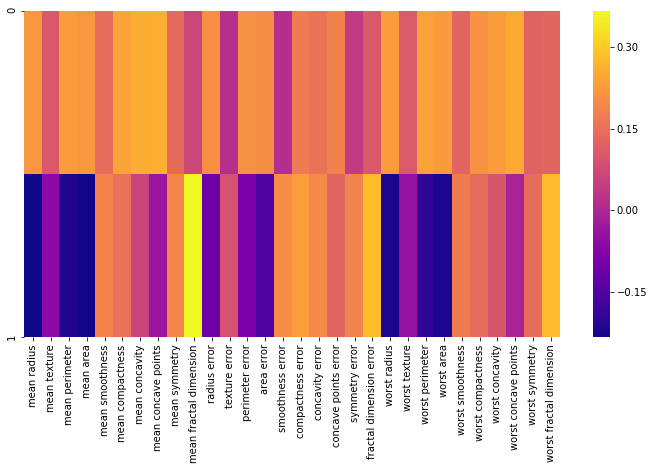

In [32]:
# Create a heatmap showing the correlation between our original features and our principal comoponents.
# Which componenets did the first feature find most important? What about the second component? 

plt.figure(figsize=(12,6))
sns.heatmap(df_comp,cmap='plasma')

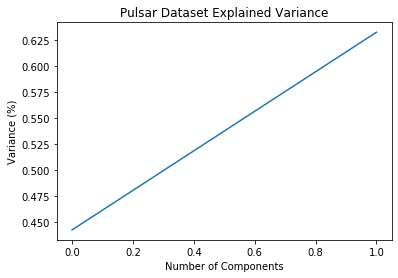

In [35]:
plt.figure()
plt.plot(np.cumsum(pca.fit(scaled_data).explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Pulsar Dataset Explained Variance')
plt.show()